# Additional Feature

In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

C:\Users\palak\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
pd.set_option('display.max_columns',250) #for displaying all the column value

In [6]:
column_names = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

df = pd.read_csv('network_intrusion_data.csv',encoding = 'ISO-8859-1',header=None,names=column_names)

In [7]:
df[:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
df.outcome.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [9]:
df.shape
df_clean = df.dropna() #drop any null value row
df.shape


(494021, 42)

In [10]:
df_unique = df_clean.drop_duplicates(keep='first', inplace=False) #removing dulicates
df_unique.shape

(145586, 42)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
outcome_list = df_unique['outcome'].tolist()

In [13]:
len(outcome_list)

145586

In [14]:
y_multilabel = le.fit_transform(outcome_list)

In [15]:
le.classes_

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype='<U16')

In [16]:
y_multilabel[1:5000]

array([11, 11, 11, ..., 11, 11, 11], dtype=int64)

In [17]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [18]:
def min_max_normalization(df,name):
    
    max_value = df[name].max()
    min_value = df[name].min()
    
    new_column = "{}_{}".format('normalized',name)
    
    df[new_column] = (df[name] - min_value) / (max_value - min_value)
    df.drop(name,axis=1,inplace = True)   

In [19]:
encode_text_dummy(df_unique,'protocol_type')

C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\palak\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
df_unique.shape

(145586, 44)

In [21]:
encode_text_dummy(df_unique,'service')

C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\palak\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
df_unique.shape

(145586, 109)

In [23]:
encode_text_dummy(df_unique,'flag')
df_unique.shape

C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\palak\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(145586, 119)

In [24]:
encode_text_dummy(df_unique,'su_attempted')
df_unique.shape

C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\palak\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(145586, 121)

In [25]:
df_unique[:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [26]:
numerical_features = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','num_root','num_file_creations','num_shells','num_access_files','count',
'srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']

In [27]:
for name in numerical_features:
    min_max_normalization(df_unique,name)

C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\palak\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
df_unique[:5]

,land,logged_in,root_shell,num_outbound_cmds,is_host_login,is_guest_login,outcome,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,normalized_duration,normalized_src_bytes,normalized_dst_bytes,normalized_wrong_fragment,normalized_urgent,normalized_hot,normalized_num_failed_logins,normalized_num_compromised,normalized_num_root,normalized_num_file_creations,normalized_num_shells,normalized_num_access_files,normalized_count,normalized_srv_count,normalized_serror_rate,normalized_srv_serror_rate,normalized_rerror_rate,normalized_srv_rerror_rate,normalized_same_srv_rate,normalized_diff_srv_rate,normalized_srv_diff_host_rate,normalized_dst_host_count,normalized_dst_host_srv_count,normalized_dst_host_same_srv_rate,normalized_dst_host_diff_srv_rate,normalized_dst_host_same_src_port_rate,normalized_dst_host_srv_diff_host_rate,normalized_dst_host_serror_rate,normalized_dst_host_srv_serror_rate,normalized_dst_host_rerror_rate,normalized_dst_host_srv_rerror_rate
0,0,1,0,0,0,0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,normal.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [29]:
df_outcome = df_unique['outcome']

In [30]:
df_unique.shape

(145586, 121)

In [31]:
df_outcome.shape

(145586,)

In [32]:
del df_unique['outcome']


In [33]:
df_unique.shape

(145586, 120)

In [34]:
df_unique[:5]

,land,logged_in,root_shell,num_outbound_cmds,is_host_login,is_guest_login,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,normalized_duration,normalized_src_bytes,normalized_dst_bytes,normalized_wrong_fragment,normalized_urgent,normalized_hot,normalized_num_failed_logins,normalized_num_compromised,normalized_num_root,normalized_num_file_creations,normalized_num_shells,normalized_num_access_files,normalized_count,normalized_srv_count,normalized_serror_rate,normalized_srv_serror_rate,normalized_rerror_rate,normalized_srv_rerror_rate,normalized_same_srv_rate,normalized_diff_srv_rate,normalized_srv_diff_host_rate,normalized_dst_host_count,normalized_dst_host_srv_count,normalized_dst_host_same_srv_rate,normalized_dst_host_diff_srv_rate,normalized_dst_host_same_src_port_rate,normalized_dst_host_srv_diff_host_rate,normalized_dst_host_serror_rate,normalized_dst_host_srv_serror_rate,normalized_dst_host_rerror_rate,normalized_dst_host_srv_rerror_rate
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.015656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.113725,0.113725,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.152941,0.152941,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011742,0.011742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.192157,0.192157,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [35]:
X=df_unique.as_matrix(columns=None)

C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [36]:
X.shape

(145586, 120)

In [37]:
y_multilabel.shape

(145586,)

# **Train & Test Data Split**

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_multilabel,test_size=0.20,random_state=1)

# **Training & Evaluating Models**

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
plt.rcParams['figure.figsize'] = [20, 10]

## **Guassian Naive Bayes**

In [41]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)

GaussianNB(priors=None)

test :  [11  9 11  9 11  9 11 11 11  9]
pred :  [11 17  0 17 11 17 11 11  0  9]

[[  221     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     1     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     3     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0    13     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0    15     0     0     0     1   105     1     0
      0     2     0     0     0     0     0     0]
 [    0     0     0     0     0     6     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


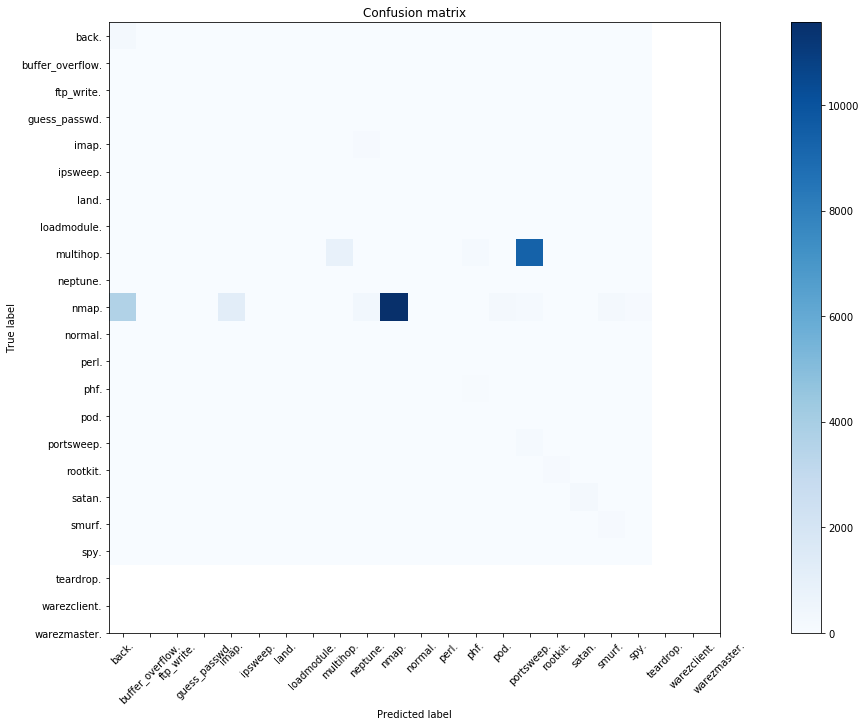


             precision    recall  f1-score   support

          0       0.06      1.00      0.11       221
          1       0.05      0.67      0.09         3
          2       0.09      1.00      0.17         3
          3       1.00      0.93      0.96        14
          5       0.01      0.12      0.02       124
          6       1.00      1.00      1.00         6
          7       0.00      0.00      0.00         1
          8       0.29      0.50      0.36         4
          9       1.00      0.08      0.15     10348
         10       0.08      1.00      0.15        40
         11       1.00      0.66      0.79     17559
         12       0.00      0.00      0.00         1
         14       0.92      1.00      0.96        36
         15       0.24      0.72      0.36        78
         16       0.01      0.50      0.02         4
         17       0.02      0.83      0.03       186
         18       0.80      1.00      0.89       118
         20       0.87      1.00      0.93  

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
y_pred_gnb = clf_gnb.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_gnb[:10])

print()

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print(cm_gnb)

print()

score = metrics.accuracy_score(y_test, y_pred_gnb)
print('Accuracy: {}'.format(score))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_gnb,average='weighted'))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_gnb,average='weighted'))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_gnb,average='weighted')) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_gnb, le.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_gnb))

## **KNN**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

test :  [11  9 11  9 11  9 11 11 11  9]
pred :  [11  9 11  9 11  9 11 11 11  9]

[[  210     0     0     0     0     0     0     0     0     0    11     0
      0     0     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     0     1]
 [    0     0     0    13     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0   123     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     6     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     1     0]
 [    0     1     0     0     0     0     0 

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


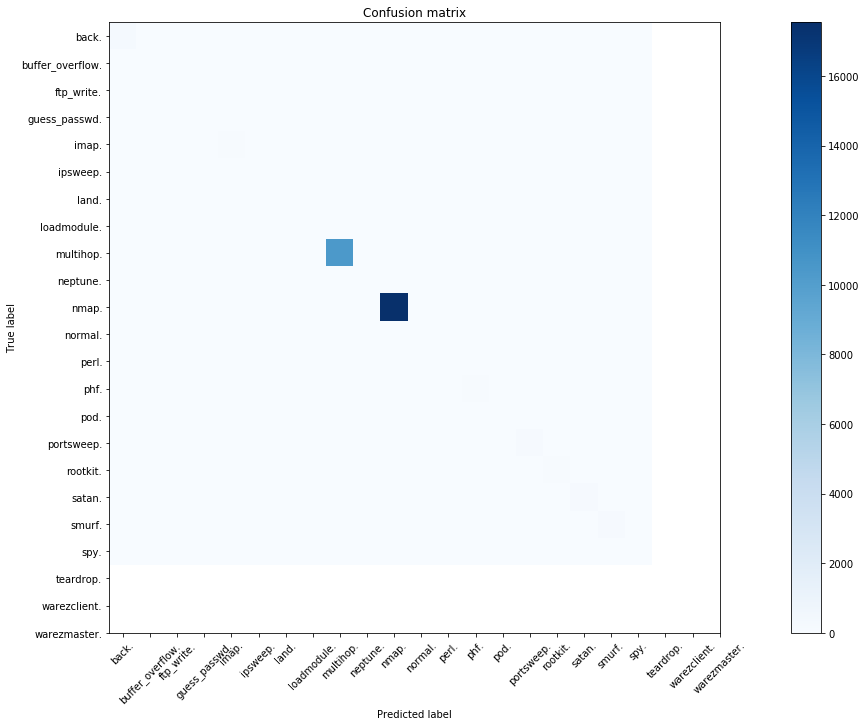


             precision    recall  f1-score   support

          0       0.96      0.95      0.96       221
          1       0.75      1.00      0.86         3
          2       0.00      0.00      0.00         3
          3       1.00      0.93      0.96        14
          5       1.00      0.99      1.00       124
          6       1.00      1.00      1.00         6
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         4
          9       1.00      1.00      1.00     10348
         10       0.97      0.97      0.97        40
         11       1.00      1.00      1.00     17559
         12       0.00      0.00      0.00         1
         14       1.00      0.97      0.99        36
         15       1.00      0.96      0.98        78
         16       0.00      0.00      0.00         4
         17       0.99      0.97      0.98       186
         18       0.99      0.99      0.99       118
         20       1.00      0.99      0.99  

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
y_pred_knn = clf_knn.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_knn[:10])

print()

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print()

score = metrics.accuracy_score(y_test, y_pred_knn)
print('Accuracy: {}'.format(score))

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_knn,average='weighted'))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_knn,average='weighted'))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_knn,average='weighted')) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_knn, le.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_knn))


## **SVM**

In [45]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

test :  [11  9 11  9 11  9 11 11 11  9]
pred :  [11  9 11  9 11  9 11 11 11  9]

[[   21     0     0     0     0     0     0     0     0     0   200     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     1     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     2     0]
 [    0     0     0    12     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0   122     0     0     0     0     0     2     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     5     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     1     0]
 [    0     0     0     0     0     0     0 

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


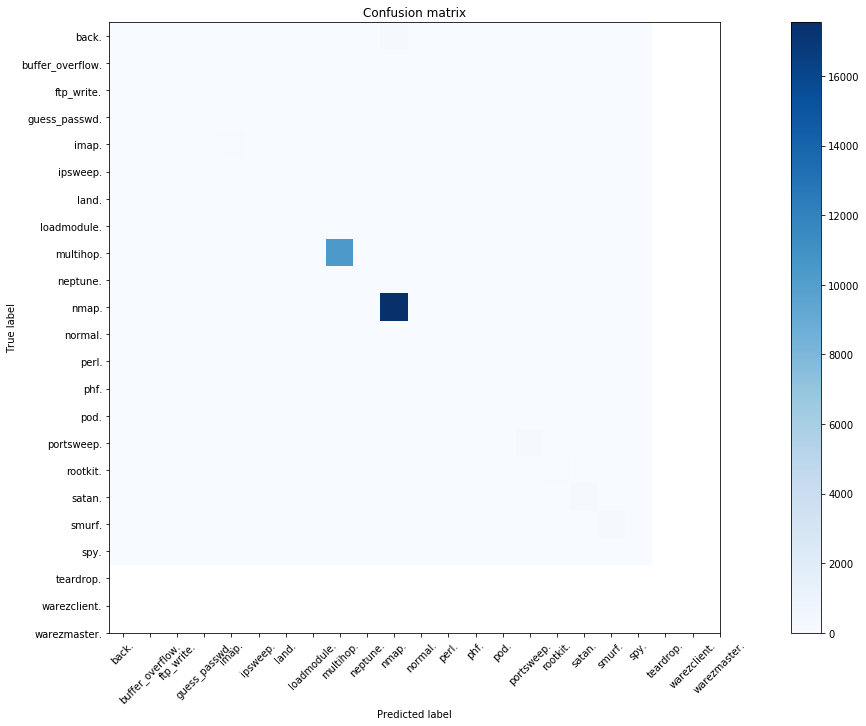

<Figure size 18000x18000 with 0 Axes>


             precision    recall  f1-score   support

          0       1.00      0.10      0.17       221
          1       0.00      0.00      0.00         3
          2       0.00      0.00      0.00         3
          3       1.00      0.86      0.92        14
          5       0.82      0.98      0.90       124
          6       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         4
          9       1.00      1.00      1.00     10348
         10       1.00      0.15      0.26        40
         11       0.98      1.00      0.99     17559
         12       0.00      0.00      0.00         1
         14       1.00      0.50      0.67        36
         15       1.00      0.77      0.87        78
         16       0.00      0.00      0.00         4
         17       0.96      0.87      0.91       186
         18       0.99      0.97      0.98       118
         20       1.00      0.99      0.99  

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
y_pred_svm = clf_svc.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_svm[:10])

print()

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print()

score = metrics.accuracy_score(y_test, y_pred_svm)
print('Accuracy: {}'.format(score))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_svm,average='weighted'))   
print("Recall Score::    ",metrics.recall_score(y_test,y_pred_svm,average='weighted'))      
print("F1 Score::        ",metrics.f1_score(y_test,y_pred_svm,average='weighted')) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_svm, le.classes_)
fig=plt.figure(figsize=(250, 250))
plt.show()

print()

print(classification_report(y_test, y_pred_svm))

## **Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

test :  [11  9 11  9 11  9 11 11 11  9]
pred :  [11  9 11  9 11  9 11 11 11  9]

[[   47     0     0     0     0     0     0     0     0     0   174     0
      0     0     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     1     0]
 [    0     0     0     0     0     0     0     0     0     0     3     0
      0     0     0     0     0     0     0     0]
 [    0     0     0    13     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0   120     0     0     0     0     0     4     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     5     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     1     0]
 [    0     1     0     0     0     0     0 

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


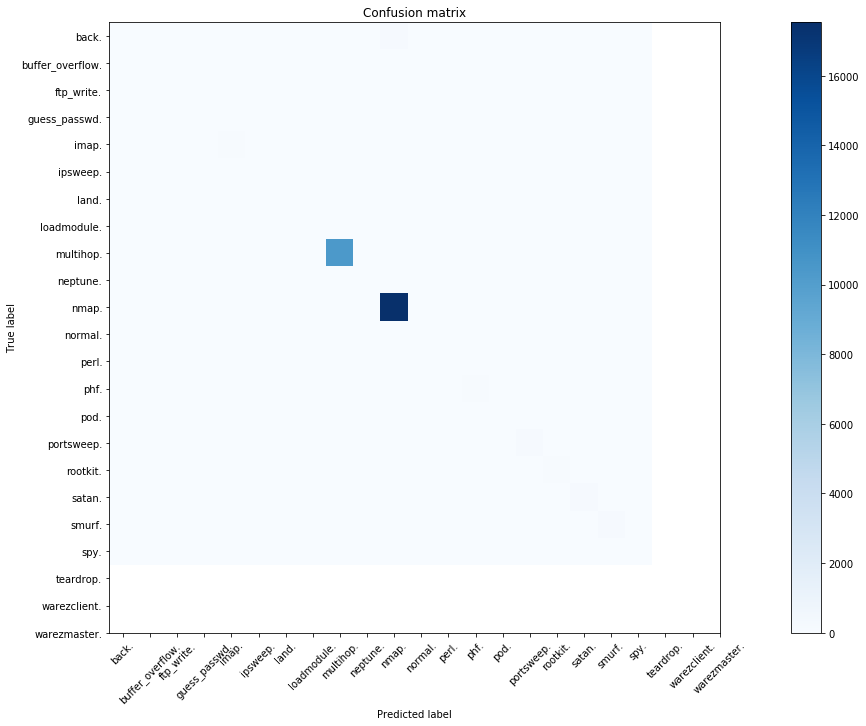


             precision    recall  f1-score   support

          0       0.94      0.21      0.35       221
          1       0.67      0.67      0.67         3
          2       0.00      0.00      0.00         3
          3       1.00      0.93      0.96        14
          5       0.82      0.97      0.89       124
          6       1.00      0.83      0.91         6
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         4
          9       1.00      1.00      1.00     10348
         10       1.00      0.15      0.26        40
         11       0.99      1.00      0.99     17559
         12       0.00      0.00      0.00         1
         14       0.97      1.00      0.99        36
         15       0.96      0.91      0.93        78
         16       0.00      0.00      0.00         4
         17       0.99      0.85      0.92       186
         18       0.99      0.98      0.99       118
         20       1.00      0.99      0.99  

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
y_pred_lr = clf_lr.predict(X_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_lr[:10])

print()

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

print()

score = metrics.accuracy_score(y_test, y_pred_lr)
print('Accuracy: {}'.format(score))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_lr,average='weighted'))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_lr,average='weighted'))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_lr,average='weighted')) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_lr, le.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_lr))

# **Neural Network**

In [49]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense

In [51]:
# columns
columns_new = ['y']

# pass in array and columns
dataframe_y = pd.DataFrame(y_multilabel , columns=columns_new)

In [52]:
encode_text_dummy(dataframe_y,'y')

In [53]:
y_tns_multilabel = dataframe_y.values

In [54]:
dataframe_y[:10]

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
y_tns_multilabel.shape

(145586, 23)

In [56]:
X_tns_train,X_tns_test,y_tns_train,y_tns_test = train_test_split(X,y_tns_multilabel,test_size=0.20,random_state=1)

## **Relu with Adam**

In [57]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(50,input_dim=X_tns_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(50,activation='relu')) # Hidden 2
    model_classification.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/100
 - 4s - loss: 0.0850 - val_loss: 0.0240
Epoch 2/100
 - 4s - loss: 0.0164 - val_loss: 0.0154
Epoch 3/100
 - 5s - loss: 0.0114 - val_loss: 0.0133
Epoch 4/100
 - 4s - loss: 0.0099 - val_loss: 0.0120
Epoch 5/100
 - 4s - loss: 0.0084 - val_loss: 0.0110
Epoch 6/100
 - 4s - loss: 0.0080 - val_loss: 0.0101
Epoch 7/100
 - 4s - loss: 0.0072 - val_loss: 0.0098
Epoch 8/100
 - 4s - loss: 0.0069 - val_loss: 0.0097
Epoch 9/100
 - 4s - loss: 0.0066 - val_loss: 0.0090
Epoch 10/100
 - 5s - loss: 0.0062 - val_loss: 0.0097
Epoch 11/100
 - 4s - loss: 0.0058 - val_loss: 0.0091
Epoch 12/100
 - 4s - loss: 0.0057 - val_loss: 0.0104
Epoch 13/100
 - 5s - loss: 0.0053 - val_loss: 0.0110
Epoch 14/100
 - 5s - loss: 0.0051 - val_loss: 0.0106
Epoch 00014: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/100
 - 5s - loss: 0.0778 - val_loss: 0.0254
Epoch 2/100
 - 5s - loss: 0.0156 - val_loss: 0.0167
Epoch 3/100
 - 4s - loss: 0.0

Accuracy: 0.9982141630606498
Precision score : 0.9979525991746422
Recall score    : 0.9982141630606498
F1 score        : 0.9980541920414767

[[  218     0     0     0     0     0     0     0     0     0     3     0
      0     0     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     1     0]
 [    0     0     1     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     1     0]
 [    0     0     0    13     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0   123     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     6     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0    

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


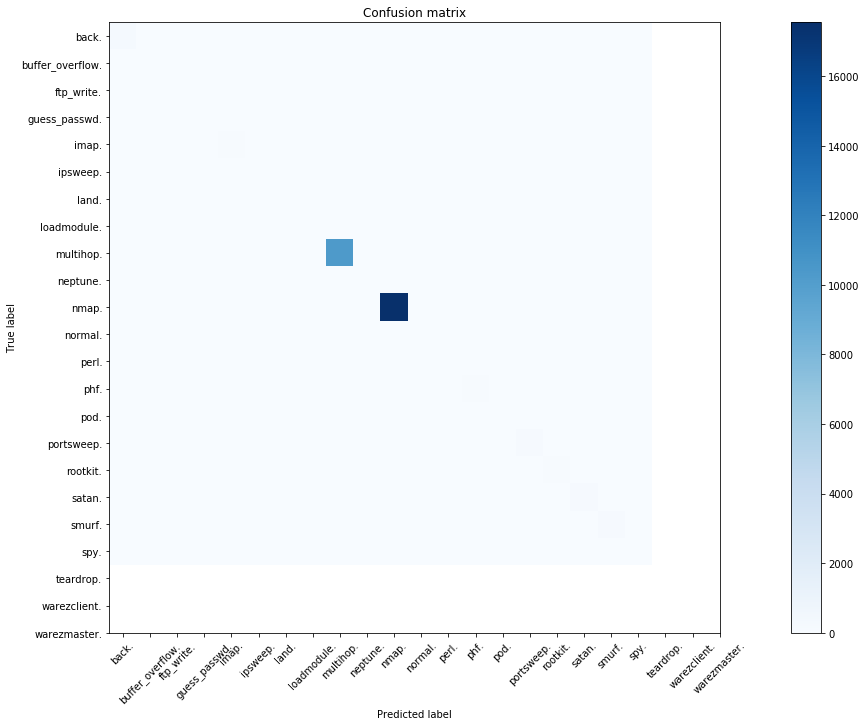

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       221
          1       1.00      0.67      0.80         3
          2       1.00      0.33      0.50         3
          3       1.00      0.93      0.96        14
          5       0.99      0.99      0.99       124
          6       1.00      1.00      1.00         6
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         4
          9       1.00      1.00      1.00     10348
         10       0.97      0.97      0.97        40
         11       1.00      1.00      1.00     17559
         12       0.50      1.00      0.67         1
         14       1.00      1.00      1.00        36
         15       1.00      0.99      0.99        78
         16       0.00      0.00      0.00         4
         17       0.99      0.97      0.98       186
         18       0.99      0.99      0.99       118
         20       1.00      1.00      1.00   

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
model_classification.load_weights('best_weights.hdf5')

pred = model_classification.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))

pr_score = metrics.precision_score(y_true, pred,average="weighted")
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average="weighted")
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average="weighted")
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, le.classes_)
plt.show()

print(classification_report(y_true, pred))

## **Sigmoid With Adam**

In [59]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification_1 = Sequential()
    model_classification_1.add(Dense(100,input_dim=X_tns_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_1.add(Dense(75,activation='sigmoid')) # Hidden 2
    model_classification_1.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_1.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_1.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 6s - loss: 0.1703 - val_loss: 0.0773
Epoch 2/1000
 - 4s - loss: 0.0560 - val_loss: 0.0464
Epoch 3/1000
 - 6s - loss: 0.0331 - val_loss: 0.0302
Epoch 4/1000
 - 4s - loss: 0.0217 - val_loss: 0.0209
Epoch 5/1000
 - 5s - loss: 0.0155 - val_loss: 0.0176
Epoch 6/1000
 - 4s - loss: 0.0128 - val_loss: 0.0146
Epoch 7/1000
 - 4s - loss: 0.0111 - val_loss: 0.0156
Epoch 8/1000
 - 4s - loss: 0.0102 - val_loss: 0.0127
Epoch 9/1000
 - 4s - loss: 0.0094 - val_loss: 0.0129
Epoch 10/1000
 - 4s - loss: 0.0089 - val_loss: 0.0115
Epoch 11/1000
 - 4s - loss: 0.0085 - val_loss: 0.0112
Epoch 12/1000
 - 4s - loss: 0.0080 - val_loss: 0.0118
Epoch 13/1000
 - 4s - loss: 0.0077 - val_loss: 0.0107
Epoch 14/1000
 - 4s - loss: 0.0075 - val_loss: 0.0101
Epoch 15/1000
 - 4s - loss: 0.0070 - val_loss: 0.0103
Epoch 16/1000
 - 4s - loss: 0.0067 - val_loss: 0.0105
Epoch 17/1000
 - 4s - loss: 0.0067 - val_loss: 0.0101
Epoch 18/1000
 - 4s - loss: 0.0064 - v

Accuracy: 0.9979394189161344
Precision score : 0.9976179110025578
Recall score    : 0.9979394189161344
F1 score        : 0.9977678781837621

[[  217     0     0     0     0     0     0     0     0     0     4     0
      0     0     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     1     0     0     0     1     0
      0     0     0     0     0     0     1     0]
 [    0     0     0    13     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0   123     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     6     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0    

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


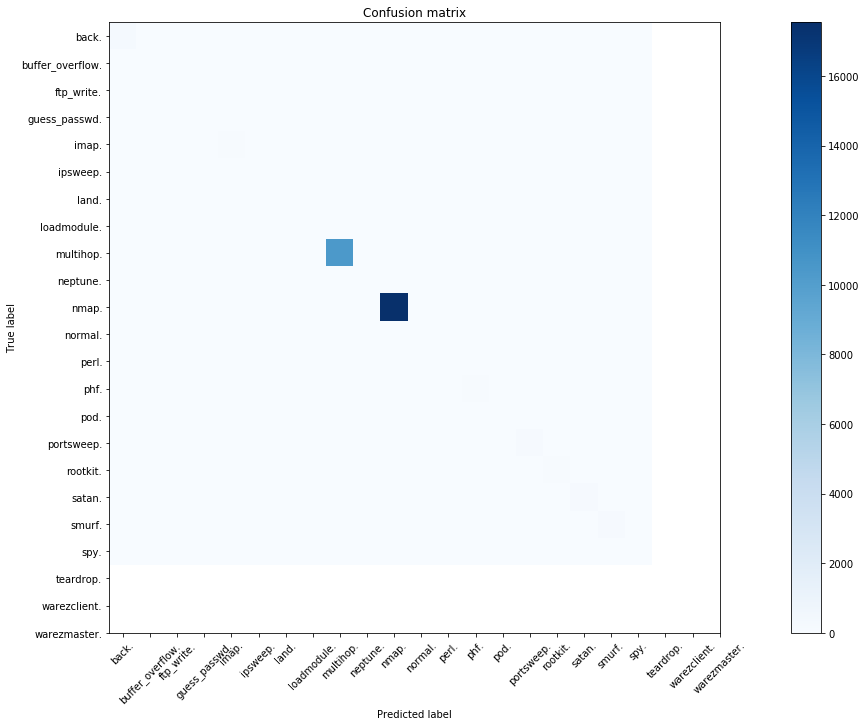

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       221
          1       0.75      1.00      0.86         3
          2       0.00      0.00      0.00         3
          3       1.00      0.93      0.96        14
          5       0.99      0.99      0.99       124
          6       1.00      1.00      1.00         6
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         4
          9       1.00      1.00      1.00     10348
         10       1.00      0.90      0.95        40
         11       1.00      1.00      1.00     17559
         12       0.50      1.00      0.67         1
         14       1.00      1.00      1.00        36
         15       0.99      0.97      0.98        78
         16       0.00      0.00      0.00         4
         17       1.00      0.97      0.99       186
         18       0.99      0.99      0.99       118
         20       1.00      1.00      1.00   

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
model_classification_1.load_weights('best_weights.hdf5')

pred = model_classification_1.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))

pr_score = metrics.precision_score(y_true, pred,average="weighted")
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred,average="weighted")
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred,average="weighted")
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, le.classes_)
plt.show()

print(classification_report(y_true, pred))

## **tanh with Adam**

In [61]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification_2 = Sequential()
    model_classification_2.add(Dense(50,input_dim=X_tns_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification_2.add(Dense(50,activation='tanh')) # Hidden 2
    model_classification_2.add(Dense(y_tns_train.shape[1],activation='softmax')) # Output
    model_classification_2.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_2.fit(X_tns_train, y_tns_train,validation_data=(X_tns_test,y_tns_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


0
Train on 116468 samples, validate on 29118 samples
Epoch 1/1000
 - 5s - loss: 0.0773 - val_loss: 0.0306
Epoch 2/1000
 - 4s - loss: 0.0202 - val_loss: 0.0183
Epoch 3/1000
 - 4s - loss: 0.0132 - val_loss: 0.0147
Epoch 4/1000
 - 4s - loss: 0.0106 - val_loss: 0.0118
Epoch 5/1000
 - 4s - loss: 0.0096 - val_loss: 0.0172
Epoch 6/1000
 - 4s - loss: 0.0086 - val_loss: 0.0109
Epoch 7/1000
 - 5s - loss: 0.0080 - val_loss: 0.0115
Epoch 8/1000
 - 7s - loss: 0.0073 - val_loss: 0.0103
Epoch 9/1000
 - 4s - loss: 0.0069 - val_loss: 0.0101
Epoch 10/1000
 - 5s - loss: 0.0064 - val_loss: 0.0096
Epoch 11/1000
 - 5s - loss: 0.0060 - val_loss: 0.0091
Epoch 12/1000
 - 5s - loss: 0.0059 - val_loss: 0.0095
Epoch 13/1000
 - 6s - loss: 0.0055 - val_loss: 0.0082
Epoch 14/1000
 - 4s - loss: 0.0051 - val_loss: 0.0100
Epoch 15/1000
 - 4s - loss: 0.0050 - val_loss: 0.0082
Epoch 16/1000
 - 5s - loss: 0.0049 - val_loss: 0.0088
Epoch 00016: early stopping
1
Train on 116468 samples, validate on 29118 samples
Epoch 1/100

Accuracy: 0.9982141630606498
Precision score : 0.9979740716691
Recall score    : 0.9982141630606498
F1 score        : 0.9980833346724548

[[  218     0     0     0     0     0     0     0     0     0     3     0
      0     0     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     2     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     1     0]
 [    0     0     0    13     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0   123     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     6     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


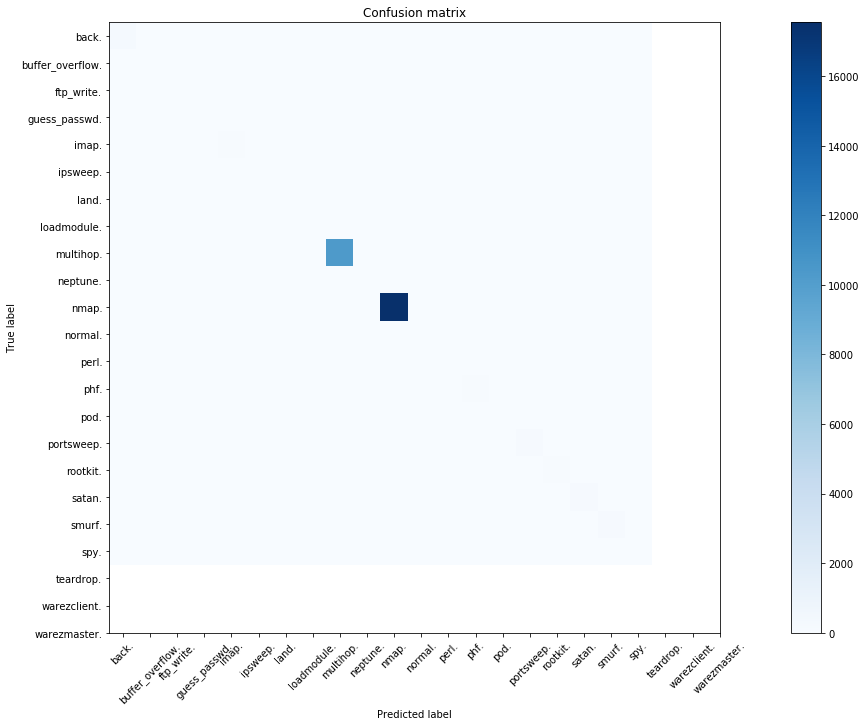

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       221
          1       1.00      1.00      1.00         3
          2       1.00      0.67      0.80         3
          3       1.00      0.93      0.96        14
          5       0.99      0.99      0.99       124
          6       1.00      1.00      1.00         6
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         4
          9       1.00      1.00      1.00     10348
         10       0.97      0.97      0.97        40
         11       1.00      1.00      1.00     17559
         12       0.50      1.00      0.67         1
         14       1.00      1.00      1.00        36
         15       0.99      0.97      0.98        78
         16       0.00      0.00      0.00         4
         17       1.00      0.96      0.98       186
         18       0.99      1.00      1.00       118
         20       1.00      1.00      1.00   

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
model_classification_2.load_weights('best_weights.hdf5')

pred = model_classification_2.predict(X_tns_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
y_true= np.argmax(y_tns_test,axis=1) 

score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))

pr_score = metrics.precision_score(y_true, pred, average="weighted")
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred,average="weighted")
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred,average="weighted")
print("F1 score        : {}".format(f1_score))

print()

cm = confusion_matrix(y_true, pred)
print(cm)

print()

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, le.classes_)
plt.show()

print(classification_report(y_true, pred))